In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset:

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
#Reshape data
X_train = X_train.reshape(len(X_train), 100, 100, 3) #which was 30000
Y_train = Y_train.reshape(len(Y_train), 1) #

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

#normalizing by 255 (RGB value)
X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


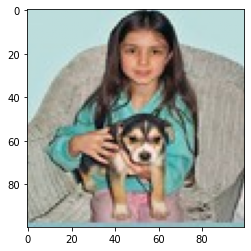

In [21]:
#showing a random data (train):

idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model:

In [22]:
#First way:

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [23]:
#2nd Way:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3))) #input layer
model.add(MaxPooling2D((2,2))) 

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #Output layer   #1 and sigmoid since it is Binary Classification

# Tuning hyperparameters on model (compiling)
- https://keras.io/api/optimizers/

In [24]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
#fit on train dataset:

model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 11s 351ms/step - loss: 0.4272 - accuracy: 0.8065
Epoch 2/5
32/32 [==============================] - 11s 345ms/step - loss: 0.3271 - accuracy: 0.8600
Epoch 3/5
32/32 [==============================] - 11s 349ms/step - loss: 0.2643 - accuracy: 0.8970
Epoch 4/5
32/32 [==============================] - 11s 345ms/step - loss: 0.1852 - accuracy: 0.9315
Epoch 5/5
32/32 [==============================] - 11s 353ms/step - loss: 0.1234 - accuracy: 0.9650


In [51]:
#Evaluating:
model.evaluate(X_test, Y_test)  #it is acceptable and id near 0.96 ► Not overfitted

13/13 [==============================] - 1s 54ms/step - loss: 0.8872 - accuracy: 0.6825


[0.8871970176696777, 0.6825000047683716]

# Prediction:

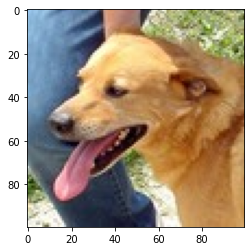

1/1 [==============================] - 0s 29ms/step
The model says it is a : Dog


In [50]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'Dog'
else:
    pred = 'Cat'
    
print("The model says it is a :", pred)